In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

import pandas as pd

In [3]:
test = pd.read_csv("./dataset/mnist_test.csv",header=None)
train = pd.read_csv("./dataset/mnist_train.csv",header=None)

<ipython-input-3-825c91ae52c8>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

In [4]:
train.shape

(60001, 785)

In [5]:
test.shape

(10001, 785)

In [6]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.drop(0,inplace=True)
train.drop(0,inplace=True)

In [8]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train = train.drop(0, axis=1)
x_test = test.drop(0, axis=1)

In [10]:
x_test.shape

(10000, 784)

In [11]:
y_train = train[0]
y_test = test[0]

In [12]:
y_train.shape

(60000,)

In [13]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [14]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255.0

In [15]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [16]:
y_test.shape

(10000,)

In [ ]:
#for cifar and fashion mnist
# num_classes = 10
# class_names = ['airplane',........]


In [17]:
from keras import layers
model=keras.Sequential([

    #cnn layers : Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)), MaxPooling2D((2,2))

    layers.Flatten(input_shape=(28,28)),
    layers.Dense(64,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test))

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9489 - loss: 0.1759 - val_accuracy: 0.9510 - val_loss: 0.1649
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9559 - loss: 0.1543 - val_accuracy: 0.9539 - val_loss: 0.1534
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9608 - loss: 0.1358 - val_accuracy: 0.9574 - val_loss: 0.1394
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9634 - loss: 0.1260 - val_accuracy: 0.9597 - val_loss: 0.1337


In [22]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc}\n")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9530 - loss: 0.1529
Test accuracy: 0.9596999883651733

Test loss: 0.1337476521730423


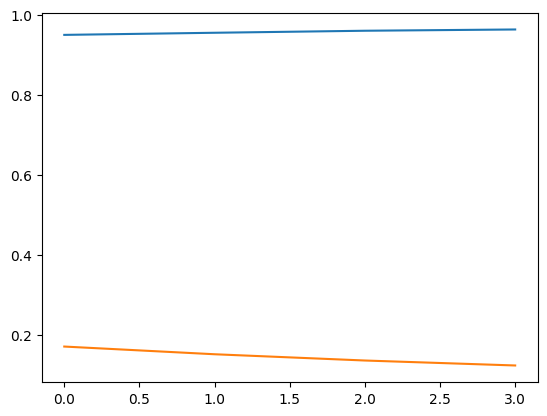

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


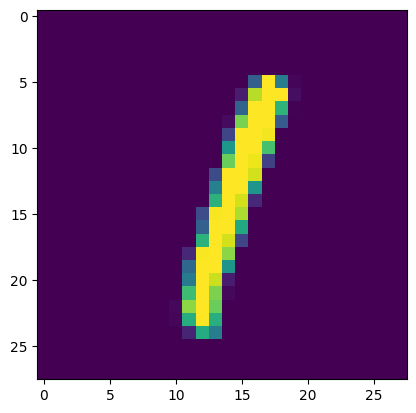

In [25]:
predictions = model.predict(x_test)
plt.imshow(x_test[5])
plt.show()

In [1]:
print(np.argmax(predictions[5]))
#print(class_names[np.argmax(prediction[5],axis=0)])

NameError: name 'np' is not defined